# Libraries

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import io
import warnings
import statistics

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [38]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models Regression from Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Input Dataset for Model

In [6]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [7]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [8]:
df_ind_trans = df_ind_trans.rename(columns={'Escolaridade_após_2005': 'Escolaridade', 'CNAE_2.0_Subclasse_targetencoder_': 'CNAE_Subclasse_targetencoder_'})

# Split Dataset into Train and Test

In [9]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 24)

In [10]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_22276\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [11]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,0.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


In [12]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

# Checking the balance of the dataset

In [13]:
lst_features = df_ind_trans.columns.tolist()
lst_features.remove('id')
lst_features.remove('Select')
lst_features

['Faixa_Etária',
 'Faixa_Hora_Contrat',
 'Faixa_Tempo_Emprego',
 'Escolaridade',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Vl_Remun_Dezembro_Nom',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tempo_Emprego',
 'Tipo_Admissão',
 'Tipo_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial',
 'CNAE_Subclasse_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'CBO_targetencoder_',
 'cidades_targetencoder_']

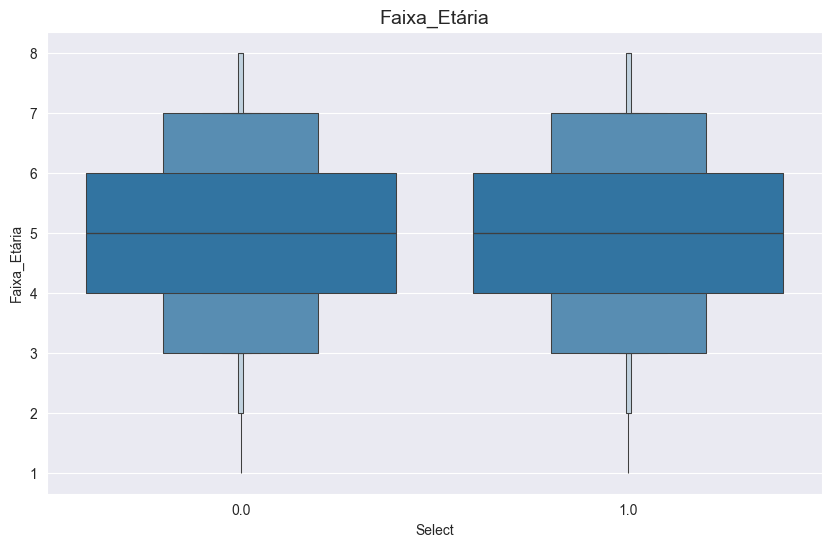

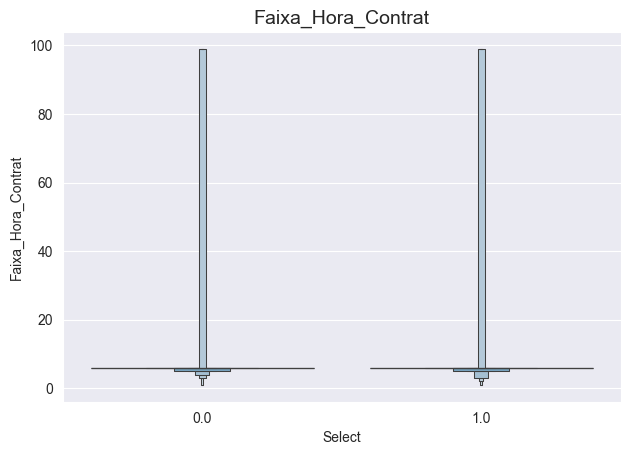

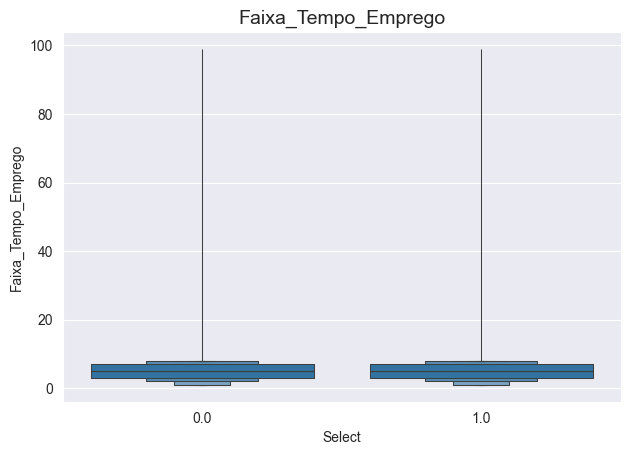

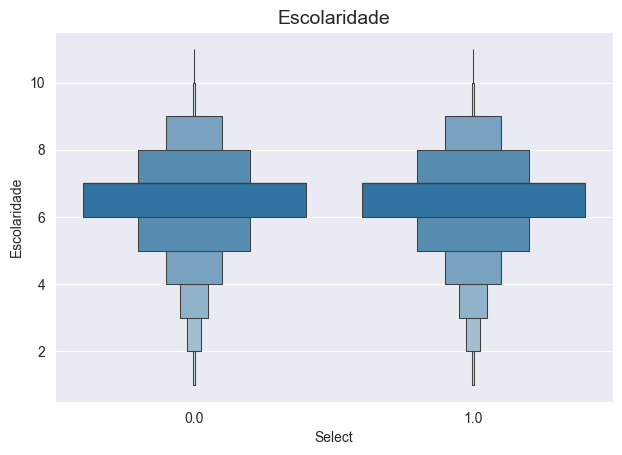

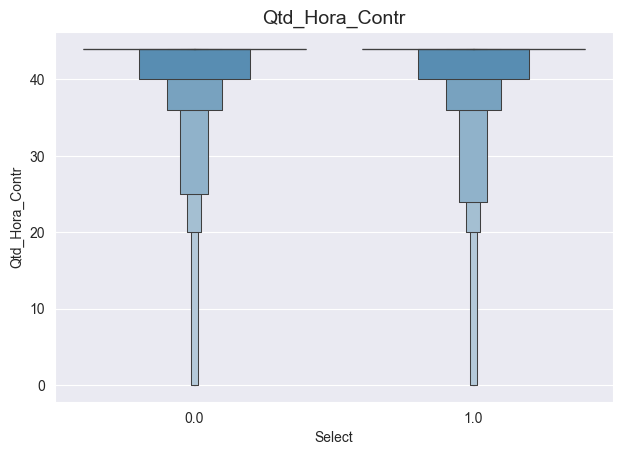

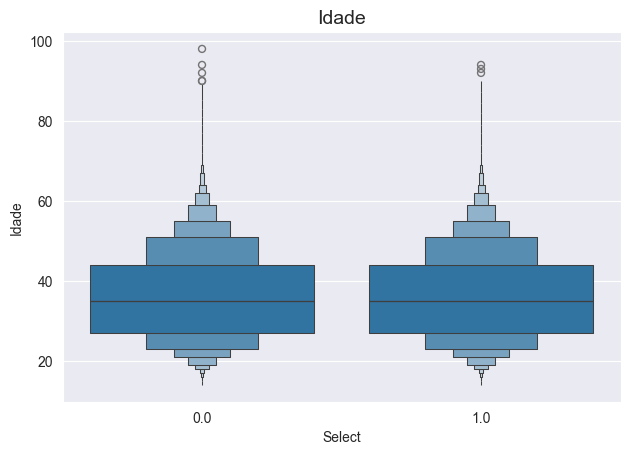

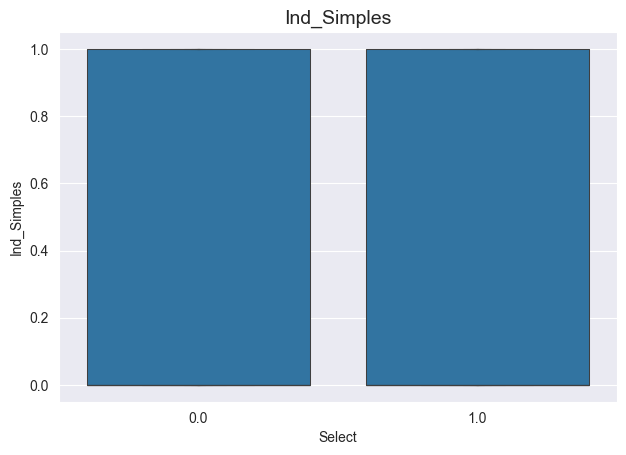

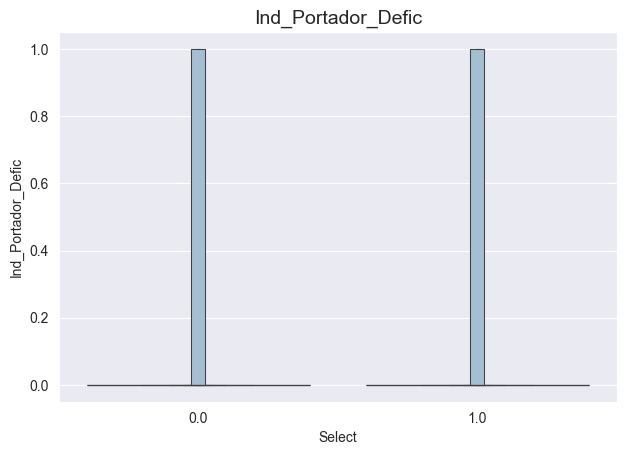

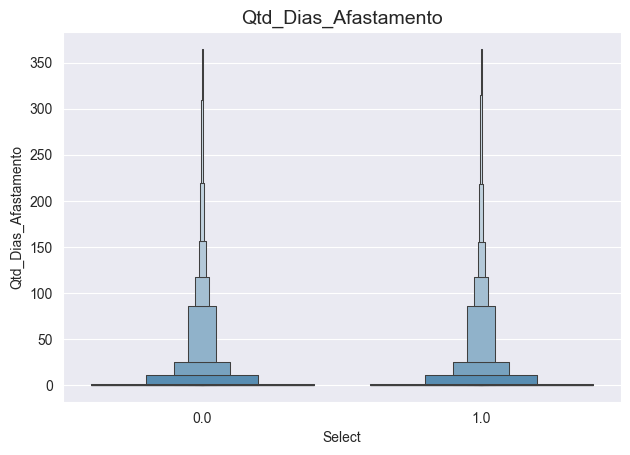

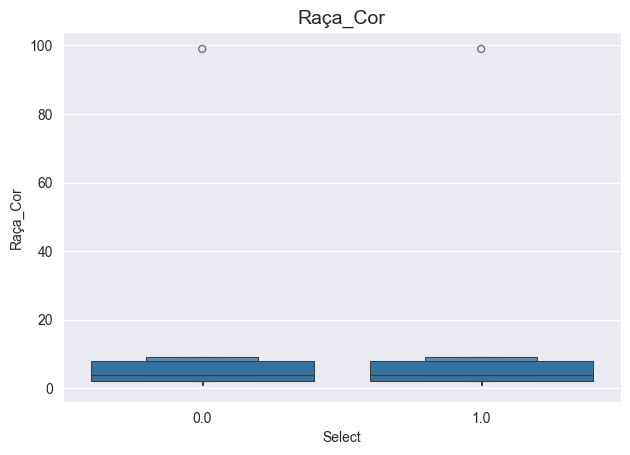

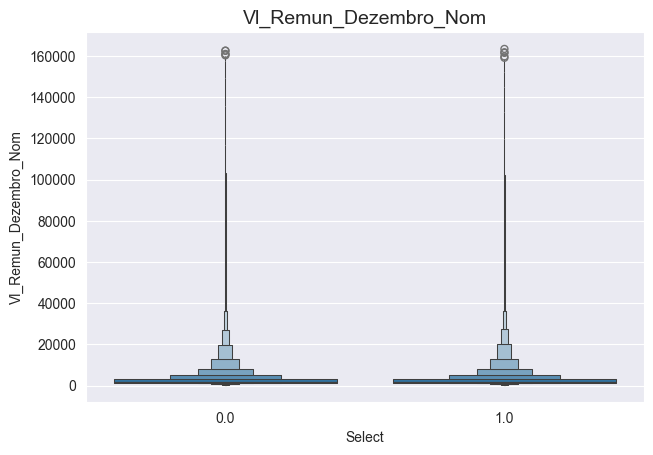

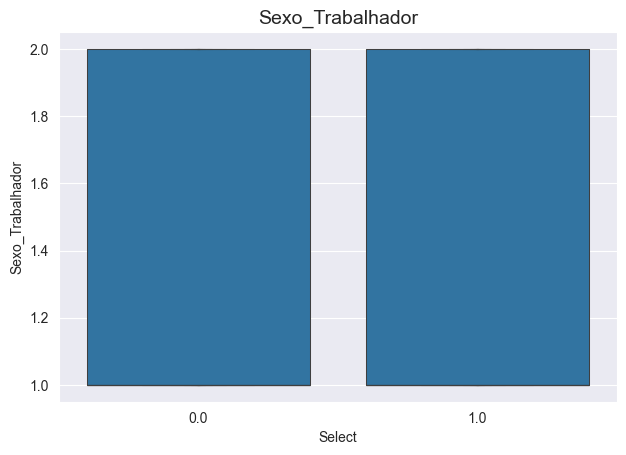

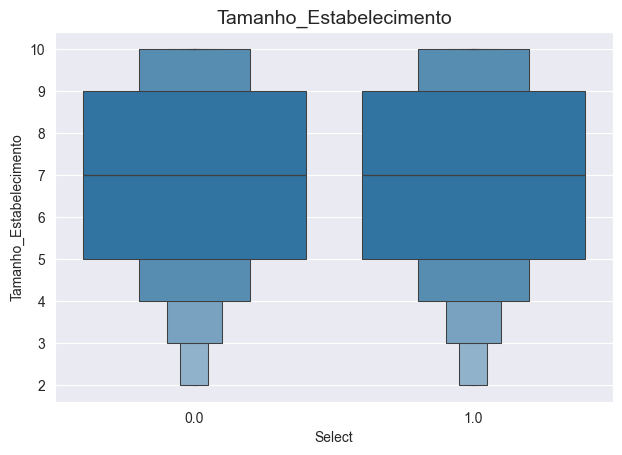

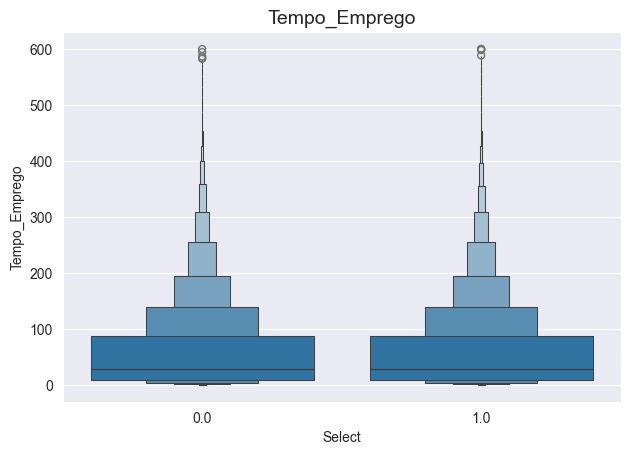

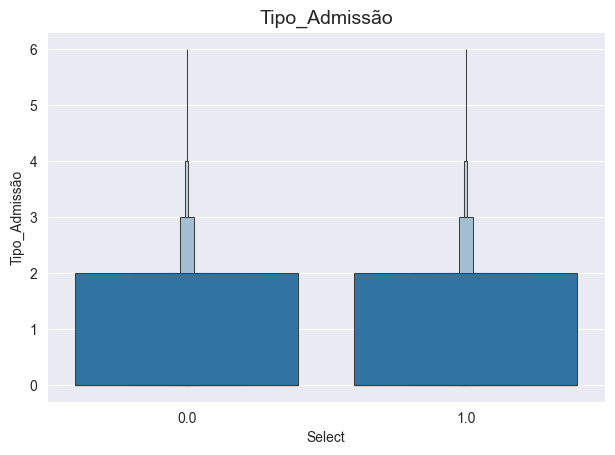

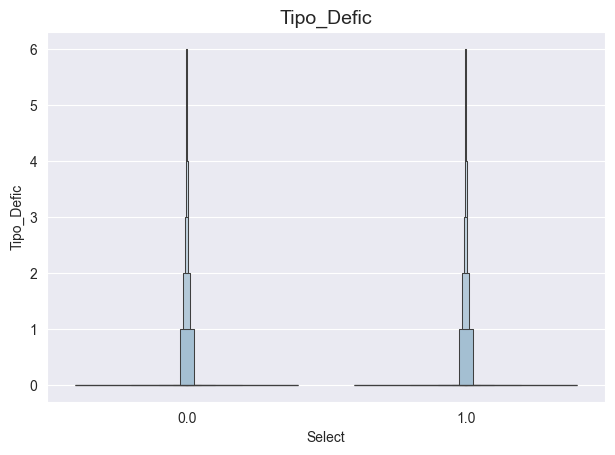

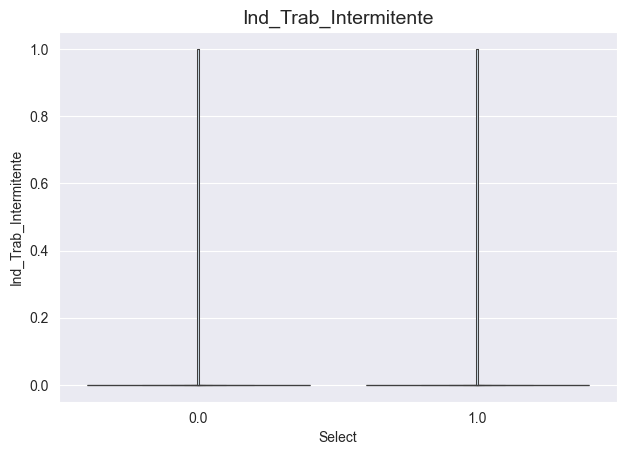

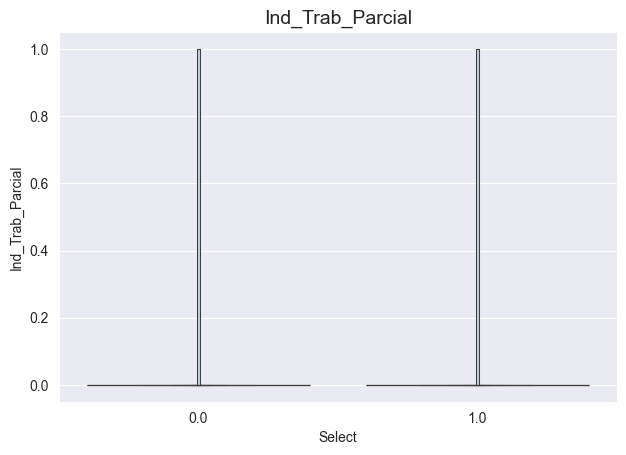

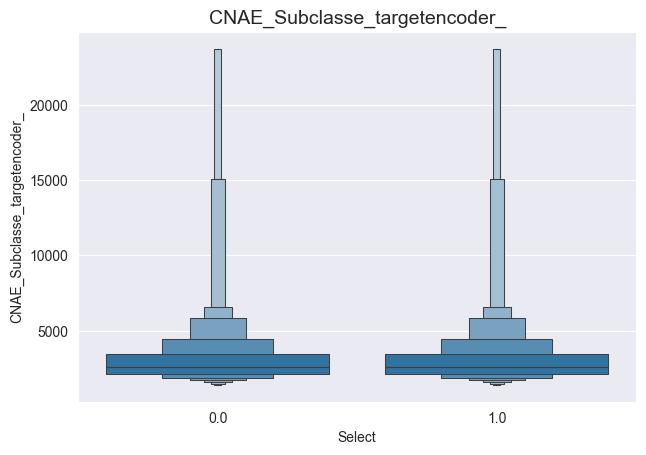

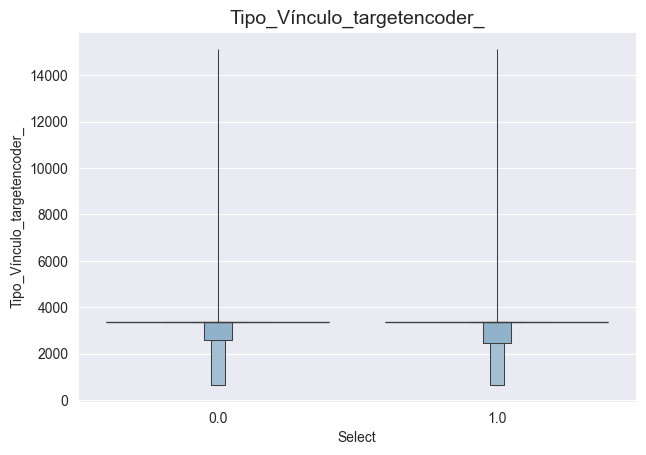

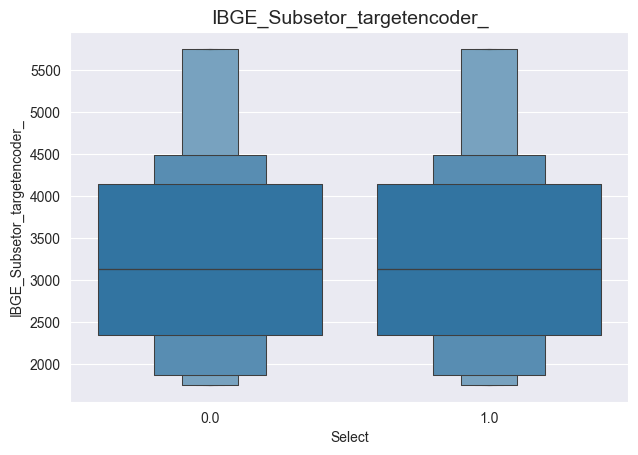

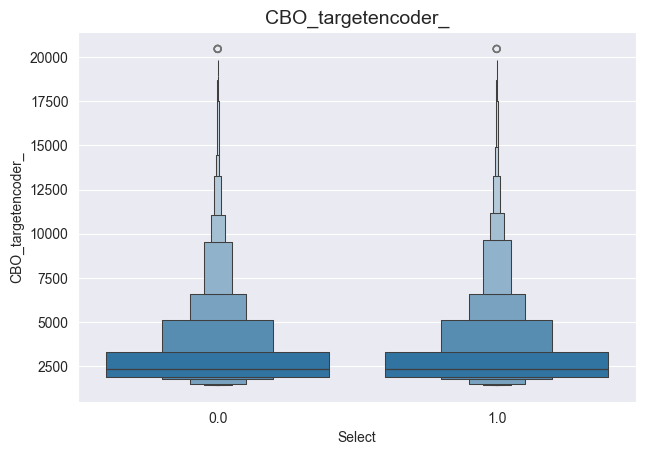

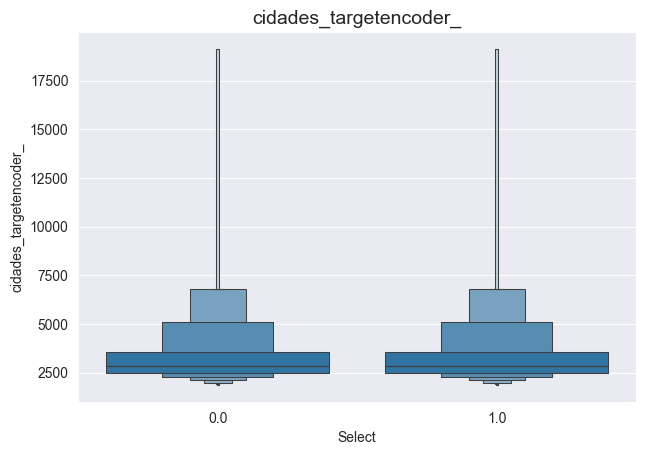

In [14]:
plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_ind_trans, x='Select', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

In [15]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,0.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


# Making Dataset de Train and Test

In [16]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 25), (573429, 25))

In [17]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 23), (573429, 23))

# View of Correlation

<Axes: >

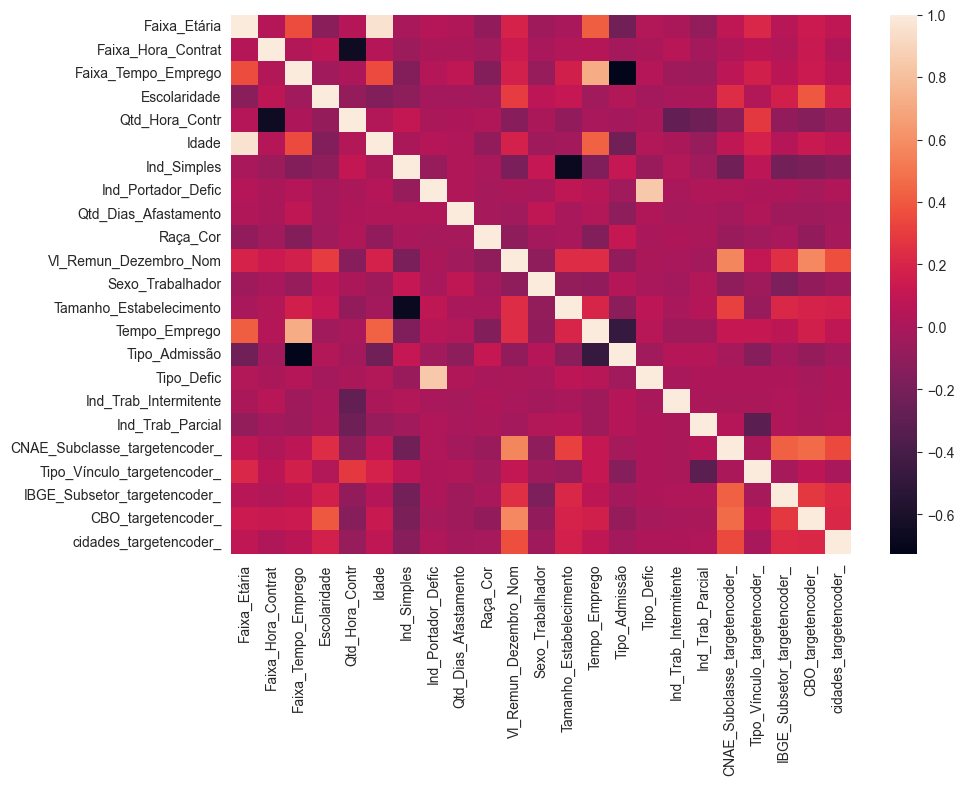

In [18]:
#plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.figsize"] = [10, 7]
cormat = df_train.corr()
#sns.heatmap(cormat, annot=True)
sns.heatmap(cormat)

# Factor Analyzer

In [19]:
lst_CORR = df_train.columns.tolist()
lst_CORR.remove('Vl_Remun_Dezembro_Nom')
df_train_CORR = df_train[lst_CORR]

In [20]:
df_train_CORR.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,
2,8,5,6,1,36,68,0,0,62,8,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
4,7,6,3,1,44,64,0,0,172,4,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046
5,5,6,3,1,44,34,1,0,0,2,1,3,11.900,1,0,0,0,1465.407,3363.495,2353.383,1583.565,2294.946
7,4,6,2,1,44,26,1,0,0,2,1,2,4.900,1,0,0,0,2645.733,3363.495,2448.238,2889.237,2967.764
8,7,5,5,1,39,64,1,0,0,9,1,5,25.900,0,0,0,0,2885.720,3363.495,3863.913,2685.251,3514.783


In [21]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_train_CORR)
chi_square_value, p_value

(4901753.357950393, 0.0)

In [22]:
kmo_model = calculate_kmo(df_train_CORR)
kmo_model

(array([0.60438127, 0.38781966, 0.67445414, 0.68739246, 0.4432119 ,
        0.59832961, 0.63697726, 0.50943091, 0.71295928, 0.88490087,
        0.66259131, 0.64356274, 0.78298163, 0.7054191 , 0.50776701,
        0.26530461, 0.58079882, 0.73286148, 0.51259328, 0.80555113,
        0.74940372, 0.83940833]),
 0.6145928241399904)

In [23]:
pca_ = PCA(n_components=2)
X_train_pca = pca_.fit_transform(df_train_CORR)
exp_var_pca = pca_.explained_variance_ratio_
D_PF_ = pd.DataFrame(exp_var_pca)
D_PF_.columns = ['variance explained']
E_PF_ = pd.DataFrame(np.cumsum(exp_var_pca))
E_PF_.columns = ['variance explained acum']
F_PF_ = pd.concat([D_PF_, E_PF_], axis=1)
F_PF_

,variance explained,variance explained acum
0,0.597,0.597
1,0.183,0.780


# Model GLM - Separating the variables

In [24]:
X = df_train.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 22), (573428,))

# Training the GLM

## Version 1

In [25]:
mod_1 = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
res_1 = mod_1.fit()
display(res_1.summary())
# For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05,
# it means that the feature affects Churn in a statistically significant way.

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573406
Model Family:                    Poisson   Df Model:                           21
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -3.2159e+08
Date:                   Fri, 21 Jun 2024   Deviance:                   6.3768e+08
Time:                           18:20:31   Pearson chi2:                 9.99e+08
No. Iterations:                       15   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Faixa_Etária                      0.2133   6.49e-05   3285.703      0.000       0.213       0.213
Faixa_Hora_Contrat                0.0428   2.91e-06   1.47e+04      0.000       0.043       0.043
Faixa_Tempo_Emprego               0.0206   7.66e-06   2693.771      0.000       0.021       0.021
Escolaridade                      0.1751   1.92e-05   9113.726      0.000       0.175       0.175
Qtd_Hora_Contr                    0.0862   5.04e-06   1.71e+04      0.000       0.086       0.086
Idade                            -0.0056   7.15e-06   -788.908      0.000      -0.006      -0.006
Ind_Simples                      -0.0076   8.53e-05    -89.545      0.000      -0.008      -0.007
Ind_Portador_Defic               -0.1205      0.000   -361.508      0.000      -0.121      -0.120
Qtd_Dias_Afastamento             -0.0007    8.7e-07   -787.883      0.000      -0.001      -0.001
Raça_Cor                         -0.0034   7.83e-06   -432.672      0.000      -0.003      -0.003
Sexo_Trabalhador                 -0.1234   5.57e-05  -2215.729      0.000      -0.124      -0.123
Tamanho_Estabelecimento           0.0796   1.42e-05   5601.430      0.000       0.080       0.080
Tempo_Emprego                     0.0011   3.11e-07   3574.243      0.000       0.001       0.001
Tipo_Admissão                     0.0168   2.94e-05    569.762      0.000       0.017       0.017
Tipo_Defic                       -0.0149      0.000   -118.274      0.000      -0.015      -0.015
Ind_Trab_Intermitente             0.5962      0.000   1227.231      0.000       0.595       0.597
Ind_Trab_Parcial                  0.8833      0.000   2067.655      0.000       0.883       0.884
CNAE_Subclasse_targetencoder_  3.736e-05   5.95e-09   6277.426      0.000    3.73e-05    3.74e-05
Tipo_Vínculo_targetencoder_       0.0001   2.94e-08   3559.090      0.000       0.000       0.000
IBGE_Subsetor_targetencoder_   5.967e-05   2.13e-08   2795.623      0.000    5.96e-05    5.97e-05
CBO_targetencoder_             7.998e-05   8.41e-09   9505.095      0.000       8e-05       8e-05
cidades_targetencoder_         9.852e-05   8.84e-09   1.11e+04      0.000    9.85e-05    9.85e-05
=================================================================================================
"""

In [26]:
np.exp(res_1.params)

Faixa_Etária                    1.238
Faixa_Hora_Contrat              1.044
Faixa_Tempo_Emprego             1.021
Escolaridade                    1.191
Qtd_Hora_Contr                  1.090
Idade                           0.994
Ind_Simples                     0.992
Ind_Portador_Defic              0.886
Qtd_Dias_Afastamento            0.999
Raça_Cor                        0.997
Sexo_Trabalhador                0.884
Tamanho_Estabelecimento         1.083
Tempo_Emprego                   1.001
Tipo_Admissão                   1.017
Tipo_Defic                      0.985
Ind_Trab_Intermitente           1.815
Ind_Trab_Parcial                2.419
CNAE_Subclasse_targetencoder_   1.000
Tipo_Vínculo_targetencoder_     1.000
IBGE_Subsetor_targetencoder_    1.000
CBO_targetencoder_              1.000
cidades_targetencoder_          1.000
dtype: float64

## Version 2

In [27]:
mod_2 = sm.OLS(y, X)    # Describe model
res_2 = mod_2.fit()       # Fit model
print(res_2.summary())   # Summarize model

                                  OLS Regression Results                                  
Dep. Variable:     Vl_Remun_Dezembro_Nom   R-squared (uncentered):                   0.643
Model:                               OLS   Adj. R-squared (uncentered):              0.643
Method:                    Least Squares   F-statistic:                          4.690e+04
Date:                   Fri, 21 Jun 2024   Prob (F-statistic):                        0.00
Time:                           18:20:47   Log-Likelihood:                     -5.5131e+06
No. Observations:                 573428   AIC:                                  1.103e+07
Df Residuals:                     573406   BIC:                                  1.103e+07
Df Model:                             22                                                  
Covariance Type:               nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025     

In [28]:
np.exp(res_2.params)
# The second question about feature importances can be answered by looking at the exponential coefficient values. 
# The exponential coefficient estimates the expected change in *Vl_Remun_Dezembro_Nom* through a given feature by a change of one unit.
# This outputs the odd ratios. Values more than 1 indicate increased *Vl_Remun_Dezembro_Nom*. Values less than 1 indicate that *Vl_Remun_Dezembro_Nom* is happening less.

Faixa_Etária                                                                 0.000
Faixa_Hora_Contrat                                                          57.266
Faixa_Tempo_Emprego                                                          0.000
Escolaridade                    20396736488310401350198832059374309787180541213...
Qtd_Hora_Contr                                                               0.000
Idade                                                          268651010099976.375
Ind_Simples                                                                  0.000
Ind_Portador_Defic                                                           0.000
Qtd_Dias_Afastamento                                                         0.137
Raça_Cor                                                                     0.000
Sexo_Trabalhador                                                             0.000
Tamanho_Estabelecimento                                                     37.578
Temp

## Version 3

In [29]:
df_train.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046
5,5,6,3,1,44,34,1,0,0,2,1100.000,1,3,11.900,1,0,0,0,1465.407,3363.495,2353.383,1583.565,2294.946
7,4,6,2,1,44,26,1,0,0,2,1752.660,1,2,4.900,1,0,0,0,2645.733,3363.495,2448.238,2889.237,2967.764
8,7,5,5,1,39,64,1,0,0,9,1889.060,1,5,25.900,0,0,0,0,2885.720,3363.495,3863.913,2685.251,3514.783


In [32]:
#Prepare it for the GLM formula
glm_columns = [e for e in df_train if e not in ['Vl_Remun_Dezembro_Nom']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_columns

'Faixa_Etária + Faixa_Hora_Contrat + Faixa_Tempo_Emprego + Escolaridade + Qtd_Hora_Contr + Idade + Ind_Simples + Ind_Portador_Defic + Qtd_Dias_Afastamento + Raça_Cor + Sexo_Trabalhador + Tamanho_Estabelecimento + Tempo_Emprego + Tipo_Admissão + Tipo_Defic + Ind_Trab_Intermitente + Ind_Trab_Parcial + CNAE_Subclasse_targetencoder_ + Tipo_Vínculo_targetencoder_ + IBGE_Subsetor_targetencoder_ + CBO_targetencoder_ + cidades_targetencoder_'

In [34]:
#Fiting it to the Generalized Linear Model
mod_3 = smf.glm(formula=f'Vl_Remun_Dezembro_Nom ~ {glm_columns}', data = df_train, family=sm.families.Poisson())
res_3 = mod_3.fit()
print(res_3.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573405
Model Family:                    Poisson   Df Model:                           22
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -2.5639e+08
Date:                   Fri, 21 Jun 2024   Deviance:                   5.0728e+08
Time:                           18:24:52   Pearson chi2:                 6.62e+08
No. Iterations:                        6   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [35]:
np.exp(res_3.params)

Intercept                       187.457
Faixa_Etária                      1.125
Faixa_Hora_Contrat                1.007
Faixa_Tempo_Emprego               1.015
Escolaridade                      1.141
Qtd_Hora_Contr                    1.005
Idade                             1.000
Ind_Simples                       0.841
Ind_Portador_Defic                0.899
Qtd_Dias_Afastamento              0.999
Raça_Cor                          0.987
Sexo_Trabalhador                  0.815
Tamanho_Estabelecimento           1.039
Tempo_Emprego                     1.001
Tipo_Admissão                     0.997
Tipo_Defic                        0.983
Ind_Trab_Intermitente             1.016
Ind_Trab_Parcial                  0.667
CNAE_Subclasse_targetencoder_     1.000
Tipo_Vínculo_targetencoder_       1.000
IBGE_Subsetor_targetencoder_      1.000
CBO_targetencoder_                1.000
cidades_targetencoder_            1.000
dtype: float64

## Model Building
### Splitting the dataset into train and test set

In [37]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((458742, 22), (114686, 22), (458742,), (114686,))

In [39]:
reg_model = linear_model.LinearRegression()

#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [40]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -6550.058004313043


[('Faixa_Etária', -28.36633870561638),
 ('Faixa_Hora_Contrat', 35.64530774920834),
 ('Faixa_Tempo_Emprego', -27.119864974640894),
 ('Escolaridade', 252.51795177737375),
 ('Qtd_Hora_Contr', -10.567148561504098),
 ('Idade', 31.701321576464885),
 ('Ind_Simples', 83.29902341285718),
 ('Ind_Portador_Defic', -409.05027551486614),
 ('Qtd_Dias_Afastamento', -2.026371192093963),
 ('Raça_Cor', -41.22261285374444),
 ('Sexo_Trabalhador', -280.09713076205185),
 ('Tamanho_Estabelecimento', 79.8072648753343),
 ('Tempo_Emprego', 6.835124155913724),
 ('Tipo_Admissão', 13.63184566927703),
 ('Tipo_Defic', -55.63927997561119),
 ('Ind_Trab_Intermitente', -1327.251888439036),
 ('Ind_Trab_Parcial', -1165.1371199147445),
 ('CNAE_Subclasse_targetencoder_', 0.6091377224729477),
 ('Tipo_Vínculo_targetencoder_', 0.5936176918310627),
 ('IBGE_Subsetor_targetencoder_', -0.23133243055379715),
 ('CBO_targetencoder_', 0.742430732206909),
 ('cidades_targetencoder_', 0.4711315429106584)]

In [41]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)

In [42]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1685.79678086 1598.37841654 6697.83966352 ...  451.41854331  567.60807369
 2623.64351006]


In [44]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff.head(10)

,Actual value,Predicted value
id,,
758288,2064.300,1685.797
30792,2197.750,1598.378
1032002,6303.180,6697.840
694212,3565.840,5630.996
1138676,1307.320,29.571
771537,16208.530,5800.759
192201,1357.770,144.817
189570,2338.230,2834.151
901612,1500.420,1793.386


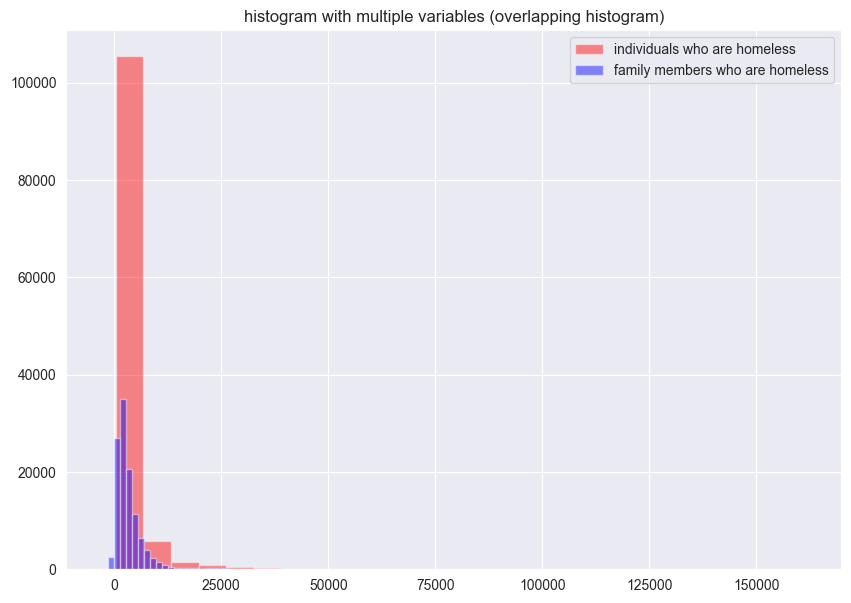

In [51]:
# plotting two histograms on the same axis 
plt.hist(reg_model_diff['Actual value'], bins=25, alpha=0.45, color='red') 
plt.hist(reg_model_diff['Predicted value'], bins=25, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['individuals who are homeless',  'family members who are homeless']) 
plt.show() 

In [52]:
reg_model_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,3316.249,3302.337
std,5181.869,3625.187
min,330.000,-2992.523
25%,1439.372,1218.411
50%,1991.720,2305.991
75%,3182.760,4155.073
max,161565.310,32374.953


In [45]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1569.0486646852696
Mean Square Error: 13447079.776775036
Root Mean Square Error: 3667.026012557729
